In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tqdm import tqdm
import numpy as np
import warnings
warnings.filterwarnings("ignore")


x, y = make_classification(n_samples=10000, n_features=2, 
                          n_informative=2, n_redundant=0, 
                          n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    stratify=y, 
                                                    random_state=42)

# del X_train,X_test

In [2]:
X_train.shape, y_train.shape

((7500, 2), (7500,))

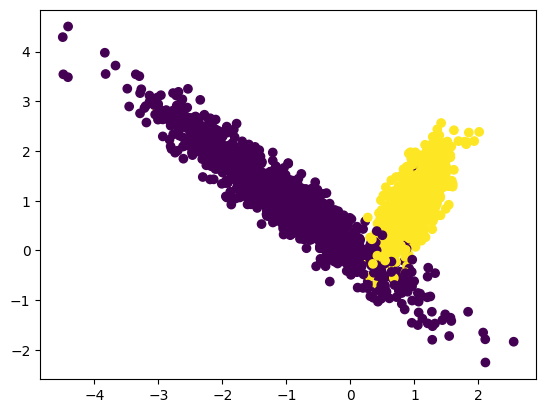

In [3]:

colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot 
#7. plot the decision boundaries for the model initialized with the best hyperparameter

</pre>

In [4]:

def unique_10_uniform_random_values_from_given_range(params_range):
    params = []
    params = list(np.random.uniform(1, 50, 10).round())
    
    # If len of unique values is < 10, then add remaining
    while len(set(params)) < 10:
        params = list(set(params))
        for x in range(0, 10-len(set(params))):
            params.append(int(np.random.uniform(1, 50, 1).round()))
    return params

def RandomSearchCV(x_train, y_train, classifier, param_range, folds):
    '''
        x_train: its numpy array of shape, (n,d)
        y_train: its numpy array of shape, (n,) or (n,1)
        classifier: its typically KNeighborsClassifier()
        param_range: its a tuple like (a,b) a < b
        folds: an integer, represents number of folds we need to devide the data and test our model
    '''
    train_scores, test_scores = [], []
    
    # Generate 10 unique values(uniform random distribution) in the given range "param_range" and 
    # store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    params = unique_10_uniform_random_values_from_given_range(param_range)
    params.sort()
    print("="*10, params)
    
    # Devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
    # group 1: 0-33, group 2:34-66, group 3: 67-100
    for k in tqdm(params):
        df = list(range(0, len(x_train)))
        sample = len(df) / folds
        df1 = df.copy()
        
        # For each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 we will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
        # test accuracies    

        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
        #  train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
        #  test accuracies
        # based on the 'folds' value we will do the same procedure
        train_cv_scores, test_cv_scores = [], []
        for f in range(0, folds):
            test_indices = []
            test_indices = df[:int(sample)]
            df = [x for x in df if x not in test_indices]
            train_indices = [x for x in df1 if x not in test_indices]
            #print(f'Fold {f} : {len(train_indices)} and {len(test_indices)}')
            
            # Selecting the data points based on the train and test indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test = x_train[test_indices]
            Y_test = y_train[test_indices]
            
            classifier.n_neighbors = int(k)
            classifier.fit(X_train, Y_train)
            
            Y_train_predicted = classifier.predict(X_train)
            train_cv_scores.append(accuracy_score(Y_train, Y_train_predicted))
            
            Y_test_predicted = classifier.predict(X_test)
            test_cv_scores.append(accuracy_score(Y_test, Y_test_predicted))
        
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"    
        train_scores.append(np.mean(np.array(train_cv_scores)))
        test_scores.append(np.mean(np.array(test_cv_scores)))

    # Return both "train_scores" and "test_scores"
    return train_scores, test_scores, params


========== [1.0, 6.0, 8.0, 10.0, 24.0, 30.0, 33.0, 37.0, 38.0, 47.0]


100%|██████████| 10/10 [00:17<00:00,  1.73s/it]


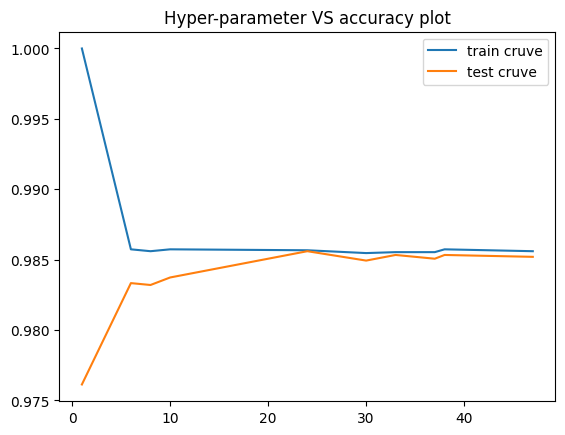

In [5]:
neigh = KNeighborsClassifier()
param_range = (1, 50)
folds = 3


train_scores, test_scores, params = RandomSearchCV(x_train=X_train, 
                                         y_train=y_train, 
                                         classifier=neigh, 
                                         param_range=param_range,
                                         folds=folds)


plt.plot(params, train_scores, label='train cruve')
plt.plot(params, test_scores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [6]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

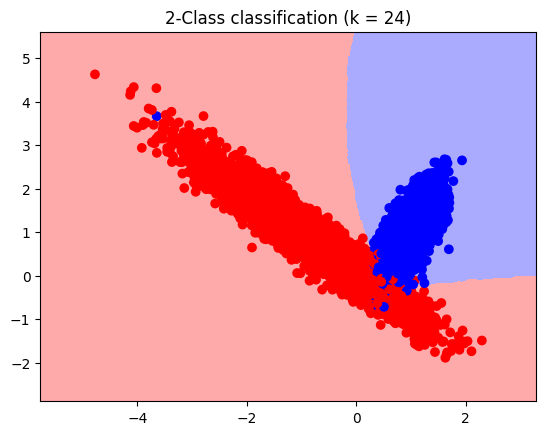

In [7]:

neigh = KNeighborsClassifier(n_neighbors = 24)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)